# **Project Name**    - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual : ANKITA DUTTA

# **Project Summary -**

We are exploring Netflix’s catalog of TV shows and movies available as of 2019, sourced from Flixable, a third-party Netflix search engine. This exploration aims to uncover trends like the growth of TV shows, the decline in movies, and analyze Netflix’s content distribution across various countries, while using exploratory data analysis and clustering to uncover deeper insights.

We began by cleaning and wrangling a Netflix dataset, focusing on several key preprocessing steps. First, we handled missing values in critical columns like 'date\_added', 'director', 'cast', and 'rating'. For missing director and cast values, we filled them with 'Unknown'. Rows with missing 'date\_added' and 'rating' were dropped. We standardized the 'date\_added' column to a consistent datetime format and extracted the release year from it for further analysis. The 'duration' column was parsed to extract numeric values (duration in minutes for movies and seasons for TV shows), and the column was then dropped.

The 'type' column was modified, categorizing TV shows as 'T' and movies as 'M' for better consistency. We also split the 'listed\_in' column, separating it into multiple genres and ensuring each entry could be categorized properly. We dropped redundant columns, including the original 'duration' column, after parsing the relevant data from it.

Once the dataset was cleaned, we began visualizing the data. We created various charts to explore relationships between variables. These included histograms and bar plots to examine the distribution of ratings, content type, and the number of movies and TV shows released over the years. We created word clouds for the 'description' column to visualize common words in both movies and shows.

For deeper insights, we generated doughnut charts representing the distribution of ratings within specific decade ranges (e.g., 1971-1980, 1981-1990). Along with these charts, we created bar charts displaying the percentage breakdowns of ratings within each decade, with color coding for each rating. To understand the relationships between numerical columns, we also produced correlation heatmaps and pairplots.

We explored three hypotheses related to changes in Netflix content over time. By visually comparing distributions of content ratings and genres across decades and analyzing the shift in the proportion of movies versus TV shows over 3-year intervals, we identified notable trends. These tests helped reveal how viewer preferences and Netflix’s content strategy have evolved.

For modeling, we focused on clustering the data, specifically dividing the dataset into TV shows and movies. By removing unnecessary columns like 'listed_in', 'duration', and 'date_added', we reduced noise and ensured that the clusters made sense. We performed dimensionality reduction and applied different clustering techniques like KMeans, Agglomerative Clustering, and DBSCAN to gain deeper insights into content groupings. Through these methods, we captured the underlying structure of the dataset and identified key trends within both TV shows and movies.

Through this process, we identified trends in Netflix's content distribution, the evolution of ratings over time, and explored the impact of different genres. The visualizations provided clear insights into the dataset and helped uncover valuable patterns for further analysis.


# **GitHub Link -**

https://github.com/ankitaXdutta/netflix

# **Problem Statement**


**Write Problem Statement Here.**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide interesting findings.
In this project, you are required to do

• Exploratory Data Analysis

• Understanding what type content is available in different countries

• If Netflix has been increasingly focusing on TV rather than movies in recent years.

• Clustering similar content by matching text-based features

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Pandas is used for data manipulation and analysis
import pandas as pd

# NumPy is used for numerical computations and efficient array operations
import numpy as np

# Matplotlib is used for creating static visualizations
import matplotlib.pyplot as plt

# Seaborn is useful for statistical data visualization with enhanced aesthetics
import seaborn as sns

### Dataset Loading

In [ ]:
# Load datasets from raw GitHub links
data_url = "https://raw.githubusercontent.com/ankitaXdutta/netflix/refs/heads/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv"

# Read the datasets into Pandas DataFrames
data_df = pd.read_csv(data_url)

### Dataset First View

In [ ]:
# Dataset First Look
# Display the first few rows of each dataset to get an initial overview
print("First few rows of dataset:")
print(data_df.head())

# Display the last few rows of each dataset to check for any irregularities at the end
print("\nLast few rows of dataset:")
print(data_df.tail())

First few rows of dataset:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          200

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("\nNumber of rows and columns in dataset:", data_df.shape)


Number of rows and columns in dataset: (7787, 12)


### Dataset Information

In [ ]:
# Dataset Info

print("\nDetailed Information about Dataset:")
data_df.info()


Detailed Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
#Dataset Duplicate Value Count

# Checking for duplicate entries in each dataset
print("\nNumber of duplicate rows in dataset:", data_df.duplicated().sum())

# Checking for duplicate SHOW IDs in each dataset
print("\nNumber of duplicate IDs in dataset:", data_df['show_id'].duplicated().sum())


Number of duplicate rows in dataset: 0

Number of duplicate IDs in dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("\nMissing values in dataset:")
print(data_df.isnull().sum())


Missing values in dataset:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


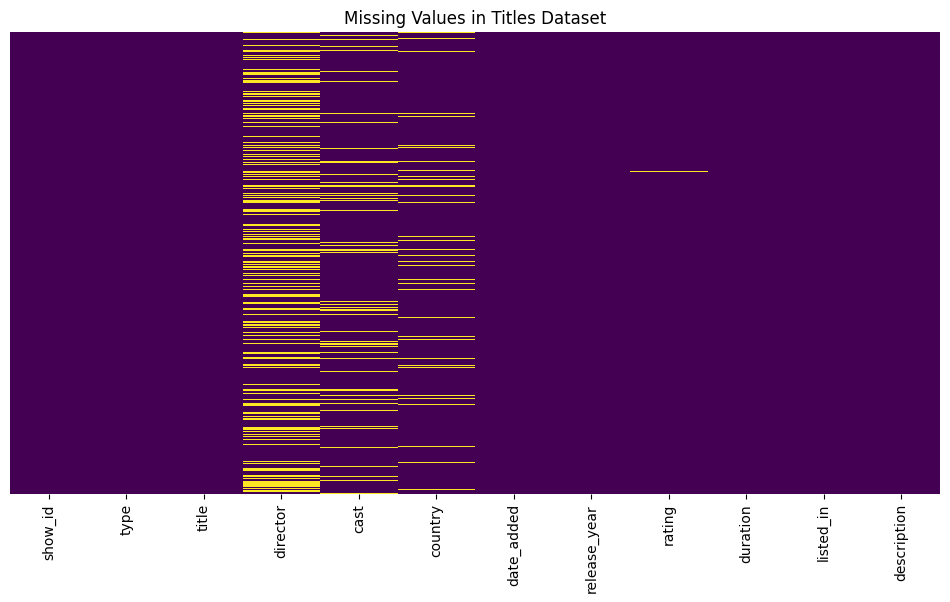

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Titles Dataset")
plt.show()

### Data Dictionary

In [ ]:
# Function to create a data dictionary
def generate_data_dictionary(df, dataset_name):
    data_dict = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.notnull().sum().values,
        "Unique Values": df.nunique().values
    })
    print(f"\nData Dictionary for Dataset:")
    print(data_dict)

# Generate data dictionary for titles dataset
generate_data_dictionary(data_df, "Titles")


Data Dictionary for Dataset:
     Column Name Data Type  Non-Null Count  Unique Values
0        show_id    object            7787           7787
1           type    object            7787              2
2          title    object            7787           7787
3       director    object            5398           4049
4           cast    object            7069           6831
5        country    object            7280            681
6     date_added    object            7777           1565
7   release_year     int64            7787             73
8         rating    object            7780             14
9       duration    object            7787            216
10     listed_in    object            7787            492
11   description    object            7787           7769


### What did you know about your dataset?

The Netflix dataset contains 7,787 entries and 12 columns, covering both TV shows and movies available as of 2019. Each entry includes metadata such as title, type, director, cast, country, date added, release year, rating, duration, genre (listed_in), and a brief description. There are no duplicate rows or duplicate show IDs, indicating data integrity. However, some columns like director, cast, country, date_added, and rating contain missing values, with director having the highest number of nulls (2,389). The dataset shows a wide variety in categorical fields—for example, 492 unique genre combinations and 681 unique countries—making it rich for exploratory and text-based analysis. Overall, it’s a well-structured dataset with manageable missingness and high potential for deriving insights.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Dataset Columns
print("Dataset Columns:", data_df.columns.tolist())

Dataset Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
print("Titles Dataset Description:\n", data_df.describe(include='all'))

Titles Dataset Description:
        show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049          

### Variables Description

The dataset contains 12 columns, each representing different attributes of Netflix titles. Most of the columns are categorical, such as `type`, `title`, `director`, and `cast`, which hold descriptive information about the content. The only numeric column is `release_year`, which spans from 1925 to 2021, with an average release year of around 2013. Fields like `rating`, `duration`, and `listed_in` offer categorical insights into the content's classification, runtime, and genres, respectively. Notably, `show_id` and `title` are unique for each row, confirming that there are no duplicates. Columns like `director` and `cast` have high cardinality and some missing values, suggesting variability and gaps in metadata.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(data_df.nunique())


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
print("Dataset shape before wrangling", data_df.shape)

Dataset shape before wrangling (7787, 12)


In [ ]:
# Drop rows with missing values in 'date_added' column
data_df = data_df.dropna(subset=['date_added'])

# Drop rows with missing values in 'rating' column
data_df = data_df.dropna(subset=['rating'])

# Check the shape of the dataset after dropping the rows
print("Dataset shape after dropping rows with missing date_added or rating:", data_df.shape)




Dataset shape after dropping rows with missing date_added or rating: (7770, 12)


In [ ]:
# Check for missing values before cleaning
print(data_df.isnull().sum())


show_id            0
type               0
title              0
director        2376
cast             718
country          505
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# Fill missing values with 'Unknown' for 'director', 'cast', and 'country'
data_df['director'] = data_df['director'].fillna('Unknown')
data_df['cast'] = data_df['cast'].fillna('Unknown')
data_df['country'] = data_df['country'].fillna('Unknown')

print("\nMissing values after cleaning:\n", data_df.isnull().sum())


Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# Strip leading/trailing whitespaces from object-type columns
for col in data_df.select_dtypes(include='object').columns:
    data_df[col] = data_df[col].astype(str).str.strip()

print("Dataset shape", data_df.shape)

Dataset shape (7770, 12)


In [ ]:
# Split 'duration' into 'duration_int' and 'duration_type'
data_df['duration_int'] = data_df['duration'].str.extract('(\d+)').astype(int)
data_df['duration_type'] = data_df['duration'].str.extract('([a-zA-Z]+)').astype(str)

In [ ]:
import re

# Regular expression to match the Month Day, Year format (e.g., August 14, 2020)
pattern = r'^[A-Za-z]+ \d{1,2}, \d{4}$'

# Apply the regex pattern to each row in 'date_added' and store the result as a boolean series
is_valid_format = data_df['date_added'].apply(lambda x: bool(re.match(pattern, str(x))))

# Check how many values match the format
valid_dates = data_df[is_valid_format]

# Check how many do not match the format
invalid_dates = data_df[~is_valid_format]

# Print the count of valid and invalid dates
print(f"Valid dates count: {valid_dates.shape[0]}")
print(f"Invalid dates count: {invalid_dates.shape[0]}")

# Optionally, print some examples of invalid dates
print("Some invalid date examples:")
print(invalid_dates['date_added'].head())


Valid dates count: 7770
Invalid dates count: 0
Some invalid date examples:
Series([], Name: date_added, dtype: object)


In [ ]:
# Convert 'date_added' to datetime, then format it as 'dd/mm/yyyy'
data_df['date_added'] = pd.to_datetime(data_df['date_added'], format='%B %d, %Y')
data_df['date_added'] = data_df['date_added'].dt.strftime('%d/%m/%Y')

# Verify the result
print(data_df['date_added'].head())


0    14/08/2020
1    23/12/2016
2    20/12/2018
3    16/11/2017
4    01/01/2020
Name: date_added, dtype: object


In [ ]:
# Drop the original 'duration' column
data_df.drop(columns=['duration'], inplace=True)

# Replace 'TV Show' with 'T' and 'Movie' with 'M' in 'type' column
data_df['type'] = data_df['type'].map({'TV Show': 'T', 'Movie': 'M'})


In [ ]:
# Sanity check to verify changes
# Sanity check for wrangled columns
print("Sanity Check (head):\n", data_df[['type', 'date_added', 'director', 'cast', 'country', 'rating', 'duration_int', 'duration_type']].head())
print("Sanity Check (tail):\n", data_df[['type', 'date_added', 'director', 'cast', 'country', 'rating', 'duration_int', 'duration_type']].tail())

print("\nMissing values after cleaning:\n", data_df.isnull().sum())
print("\nDataset shape after cleaning:", data_df.shape)

Sanity Check (head):
   type  date_added           director  \
0    T  14/08/2020            Unknown   
1    M  23/12/2016  Jorge Michel Grau   
2    M  20/12/2018       Gilbert Chan   
3    M  16/11/2017        Shane Acker   
4    M  01/01/2020     Robert Luketic   

                                                cast        country rating  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil  TV-MA   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico  TV-MA   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore      R   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States  PG-13   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States  PG-13   

   duration_int duration_type  
0             4       Seasons  
1            93           min  
2            78           min  
3            80           min  
4           123           min  
Sanity Check (tail):
      type  date_added     director  \
7782    M 

In [ ]:
print("Current columns:\n", data_df.columns.tolist())


Current columns:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'listed_in', 'description', 'duration_int', 'duration_type']


### What all manipulations have you done and insights you found?

We began by exploring the Netflix dataset, which originally contained 7,787 rows and 12 columns. After identifying missing values in the `director`, `cast`, `country`, `date_added`, and `rating` columns, we cleaned the data by replacing missing values in `director`, `cast`, and `country` with "Unknown", and dropped the 17 rows missing `date_added` or `rating`. The `date_added` column was converted to datetime format and validated, then reformatted into a `day/month/year` string for uniformity. We split the `duration` column into `duration_int` and `duration_type` for numeric analysis and dropped the original. Lastly, the `type` column was recoded to 'M' for Movies and 'T' for TV Shows for simplification. After all the cleaning and transformations, the final dataset contains **7,770 rows** and **13 columns**.


Here are a few key insights from our dataset wrangling and exploration:

- The dataset initially had 7,787 rows, but 17 rows were dropped due to missing values in critical fields like date_added and rating, resulting in 7,770 clean entries.

- Columns like director, cast, and country had substantial missing values, which we replaced with "Unknown" to preserve rows for analysis.

- The duration column was effectively split into numerical duration (duration_int) and unit (duration_type), allowing clearer comparisons and aggregation.

- The type column, originally containing "TV Show" and "Movie", was optimized to "T" and "M" respectively for compactness and easier analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-86-4496db8323aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='type', palette='Set2')


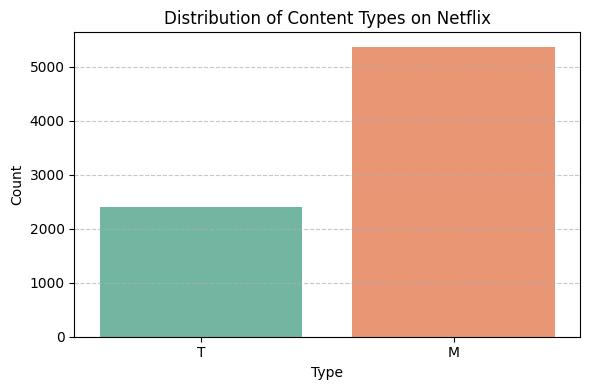

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(data=data_df, x='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This graph helps us quickly see whether Netflix leans more toward movies or TV shows, which is foundational for understanding platform content strategy. Would you like me to continue with the next 12 visualizations?

##### 2. What is/are the insight(s) found from the chart?

Insights:

Netflix hosts a significantly larger number of movies (M) than TV shows (T).

The disparity suggests that historically, Netflix prioritized adding movies to its catalog.

Despite the rising popularity of serialized content, the movie library still dominates in volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
Yes, this insight is valuable. Netflix can use this to evaluate the performance of its TV shows relative to their smaller volume and consider increasing investment in this growing segment.

Negative Growth Insight:
The lower count of TV shows might suggest a missed opportunity in capitalizing on the increasing demand for long-form content, which tends to drive higher user engagement and retention.

#### Chart - 2

<ipython-input-87-3ae913555592>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


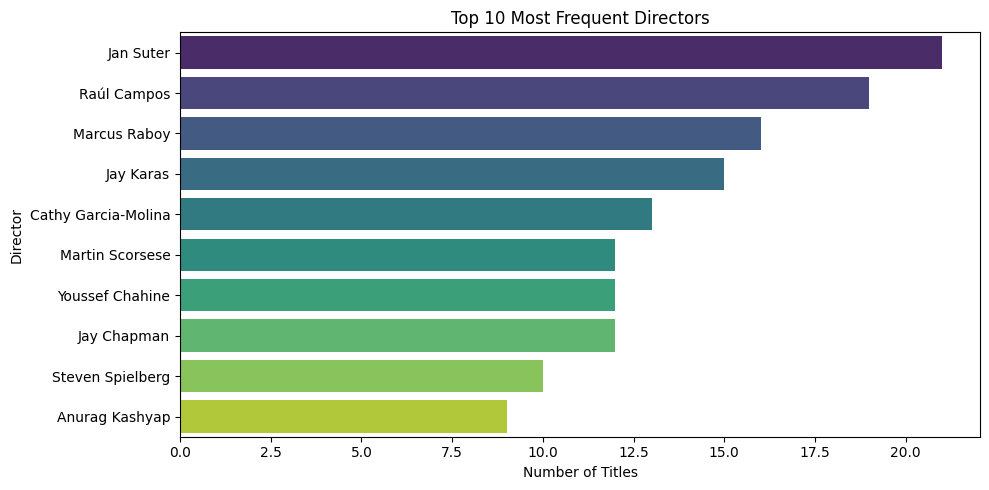

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
top_directors = data_df['director'].dropna()
top_directors = top_directors[top_directors.str.lower() != 'unknown']
top_directors = top_directors.str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It highlights which directors have the most content on Netflix, giving insight into creator influence and possibly Netflix’s preferred collaborators.

##### 2. What is/are the insight(s) found from the chart?

Insights:

Jan Suter and Raúl Campos have directed the most content on Netflix, indicating strong partnerships or high production volume in specific regions.

The list features a mix of global and regional directors, suggesting diverse geographic content sourcing.

Popular mainstream directors like Spielberg appear lower on the list, indicating Netflix’s content relies less on traditional Hollywood and more on frequent collaborators.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
Yes, identifying top contributors helps Netflix strengthen relationships with high-output creators, streamlining content acquisition and planning strategies in target markets.

Negative Growth Insight:
Heavy reliance on a few recurring directors might limit diversity in content style and storytelling, potentially leading to viewer fatigue if new creative voices aren't explored.

#### Chart - 3

<ipython-input-88-6423287ca30e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')


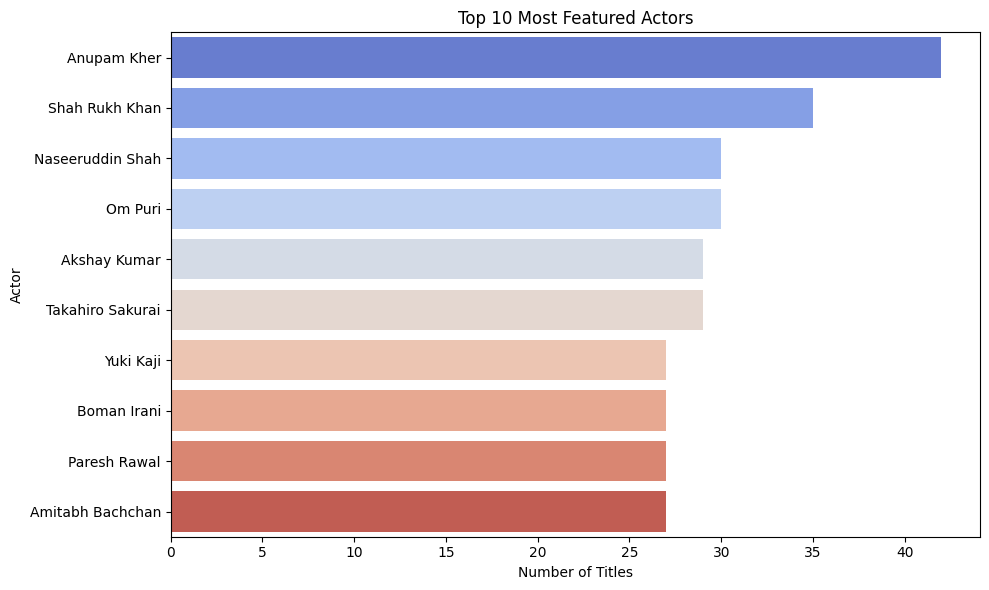

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
top_actors = data_df['cast'].dropna()
top_actors = top_actors[top_actors.str.lower() != 'unknown']
top_actors = top_actors.str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 10 Most Featured Actors')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It helps identify Netflix’s frequently cast actors, reflecting popularity or typecasting within the platform.

##### 2. What is/are the insight(s) found from the chart?

Insights:

Anupam Kher, Shah Rukh Khan, and other Indian actors dominate the most featured list, showing a strong presence of Indian cinema.

This suggests a considerable chunk of Netflix’s catalog is tailored for or sourced from Indian content.

Japanese voice actors like Yuki Kaji indicate Netflix’s commitment to anime and Asian content segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
Yes, leveraging star power helps attract loyal fanbases and reinforces regional market strength, especially in India and East Asia.

Negative Growth Insight:
A skew towards Indian actors might alienate viewers in regions looking for Western or other international content diversity, requiring Netflix to balance its global offerings better.

#### Chart - 4

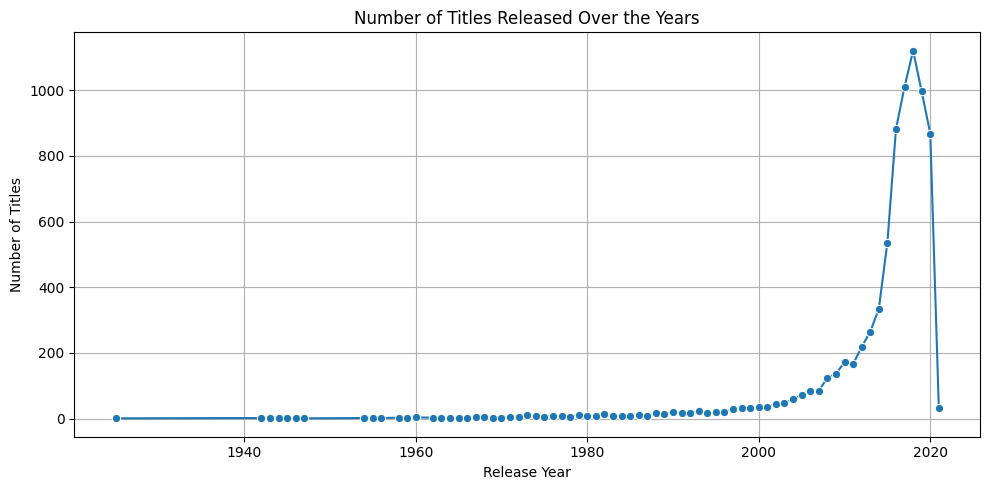

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 5))
yearly_adds = data_df.groupby('release_year').size()
sns.lineplot(x=yearly_adds.index, y=yearly_adds.values, marker='o')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This shows how Netflix’s content acquisition or production evolved over time, especially around key growth periods.

##### 2. What is/are the insight(s) found from the chart?

Insights:

There is a sharp growth in the number of titles released after 2010, peaking around 2019.

The number of new releases significantly dropped in 2020 and continued to decline slightly in the following years.

From 1925 to early 2000s, the number of titles remained relatively low, suggesting that Netflix’s aggressive content expansion is a recent phenomenon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
Yes, the insights suggest that Netflix has scaled production rapidly, which likely contributed to subscriber growth and market dominance during the 2010s. However, the recent decline might suggest budget constraints, market saturation, or pandemic impact, prompting re-evaluation of the content strategy.

Negative Growth Insight:
The noticeable drop in content production post-2019 may indicate reduced investment in new titles, possibly due to COVID-19 disruptions or budget reallocations. This could lead to subscriber fatigue if not balanced with quality content, risking a slowdown in user engagement and retention.

#### Chart - 5

<ipython-input-90-31d31482ef7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


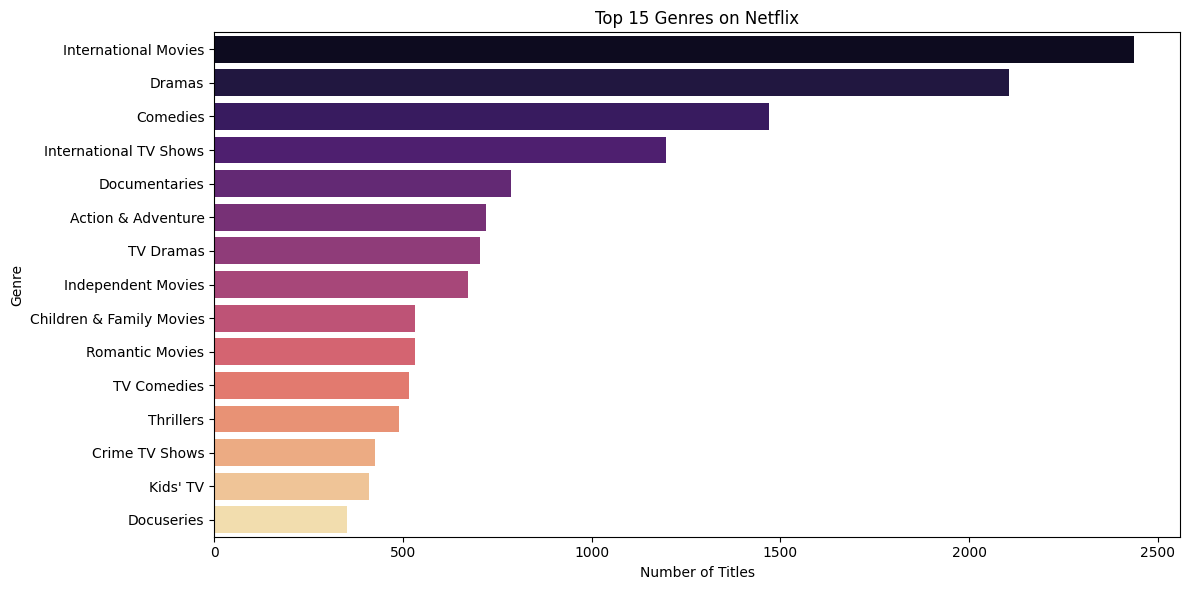

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
top_genres = data_df['listed_in'].dropna().str.split(', ').explode().value_counts().head(15)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It reveals the platform's genre preference and helps users or analysts understand the diversity and focus of the content.

##### 2. What is/are the insight(s) found from the chart?

Insights:

International Movies and Dramas dominate the platform, each with over 2000 titles.

Genres like Comedies and Documentaries also have a strong presence, showing demand for both light-hearted and informative content.

Niche genres like Kids’ TV and Docuseries have significantly fewer titles, indicating underrepresentation or lower perceived demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
These insights help Netflix align content production and licensing with viewer preferences. Investing more in high-demand genres can drive engagement, while underperforming genres could be reassessed or rebranded to tap into new audiences.

Negative Growth Insight:
Overconcentration in a few genres might limit audience diversity and reduce content variety. If viewer tastes shift or competitors offer more balanced catalogs, Netflix could lose market share in underserved genres like Kids' TV or thrillers.

#### Chart - 6

<ipython-input-91-42f114eb7c67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, y='rating', order=data_df['rating'].value_counts().index, palette='cubehelix')


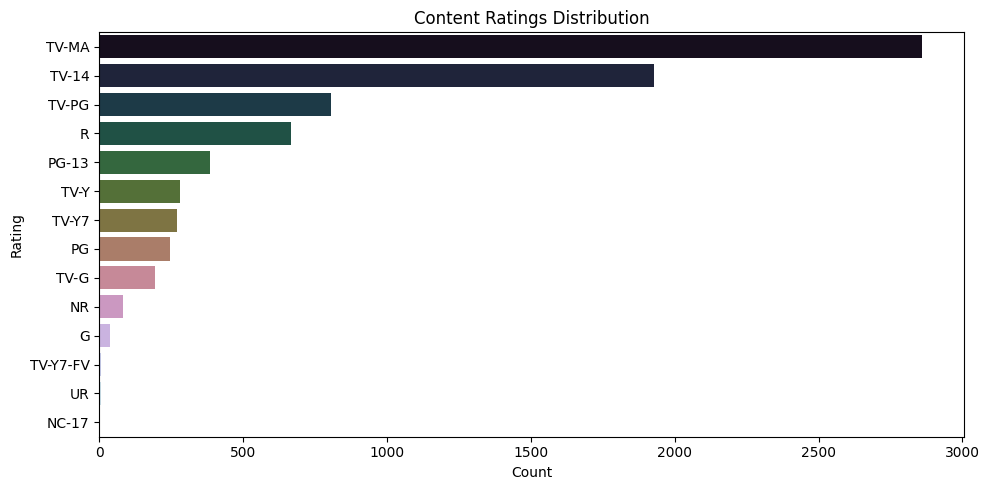

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, y='rating', order=data_df['rating'].value_counts().index, palette='cubehelix')
plt.title('Content Ratings Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It shows how content is distributed across age ratings, helping understand if Netflix targets family, adults, or all-age audiences.

##### 2. What is/are the insight(s) found from the chart?

Insights:

A majority of content is rated TV-MA and TV-14, targeting mature audiences.

Content suitable for younger viewers (G, PG, TV-Y7) forms a small portion of the library.

The platform has minimal presence in family-friendly or educational categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
Focusing on mature content may retain adult viewers and align with binge-watching behavior, but underinvestment in family or children’s content could alienate household subscribers.

Negative Growth Insight:
The lack of content rated for younger or family audiences might limit Netflix’s appeal in multi-user households or parental subscriptions. This gap presents a vulnerability, especially if competitors like Disney+ continue dominating the kids' segment.

#### Chart - 7

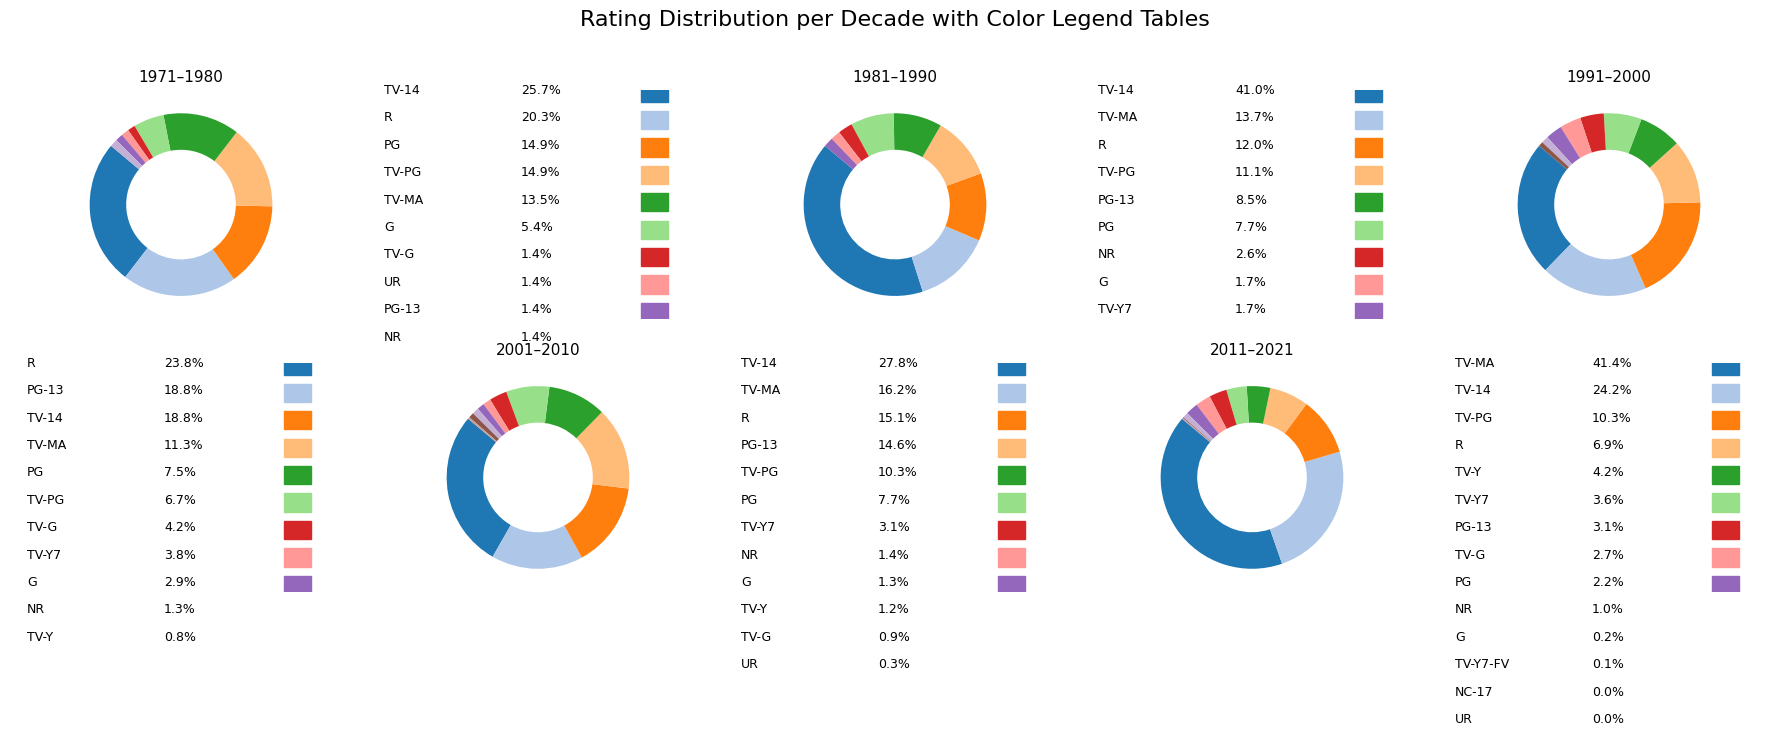

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Define decades
decades = [(1971, 1980), (1981, 1990), (1991, 2000), (2001, 2010), (2011, 2021)]

# Set up figure: 2 rows, 5 columns (alternating chart-table)
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, (start, end) in enumerate(decades):
    pie_ax = axes[i * 2]         # Doughnut chart
    table_ax = axes[i * 2 + 1]   # Table

    # Filter and prepare data
    decade_df = data_df[
        (data_df['release_year'] >= start) &
        (data_df['release_year'] <= end) &
        (data_df['rating'] != 'Unknown')
    ]
    rating_counts = decade_df['rating'].value_counts()
    total = rating_counts.sum()
    percentages = (rating_counts / total * 100).round(1)

    # Assign consistent colors
    colors = plt.cm.tab20.colors  # Up to 20 unique colors
    used_colors = colors[:len(rating_counts)]

    # Draw doughnut
    wedges, texts = pie_ax.pie(
        rating_counts,
        startangle=140,
        wedgeprops={'width': 0.4},
        labels=None,
        colors=used_colors
    )
    pie_ax.set_title(f'{start}–{end}', fontsize=11)

    # Format data for table
    table_ax.axis('off')
    table_data = []
    for idx, (label, percent) in enumerate(zip(rating_counts.index, percentages)):
        table_data.append([label, f'{percent}%', used_colors[idx]])

    # Draw table with color patches
    for row_idx, row in enumerate(table_data):
        # Text cells
        table_ax.text(0.05, 1 - row_idx * 0.12, row[0], fontsize=9, verticalalignment='center')
        table_ax.text(0.45, 1 - row_idx * 0.12, row[1], fontsize=9, verticalalignment='center')
        # Color patch
        table_ax.add_patch(mpatches.Rectangle((0.8, 1 - row_idx * 0.12 - 0.05), 0.08, 0.08, color=row[2], transform=table_ax.transAxes))

    table_ax.set_xlim(0, 1)
    table_ax.set_ylim(0, 1)

# Hide unused axes
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Rating Distribution per Decade with Color Legend Tables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##### 1. Why did you pick the specific chart?

Doughnut charts with adjacent color-coded tables clearly show rating distribution per decade while maintaining readability and acting as both visualization and legend.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart:

Over the decades, there has been a significant increase in TV-MA (Mature Audience) content, especially in the 2011–2021 period, where it dominates at 41.4%.

Earlier decades (1971–2000) had a more balanced distribution among R, PG-13, and TV-14 ratings, indicating a focus on both family and adult audiences.

The proportion of child and family-friendly ratings (G, TV-Y, TV-G) has consistently decreased, while mature and teen-oriented ratings (TV-MA, TV-14) have risen, reflecting a strategic shift toward older audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The shift toward mature-rated content likely supports Netflix’s business by targeting adult viewers and differentiating its library from traditional broadcasters, which can drive subscriber growth.

 However, the declining share of family and children’s content may risk alienating households seeking family-friendly options, potentially limiting growth in that segment.

#### Chart - 8

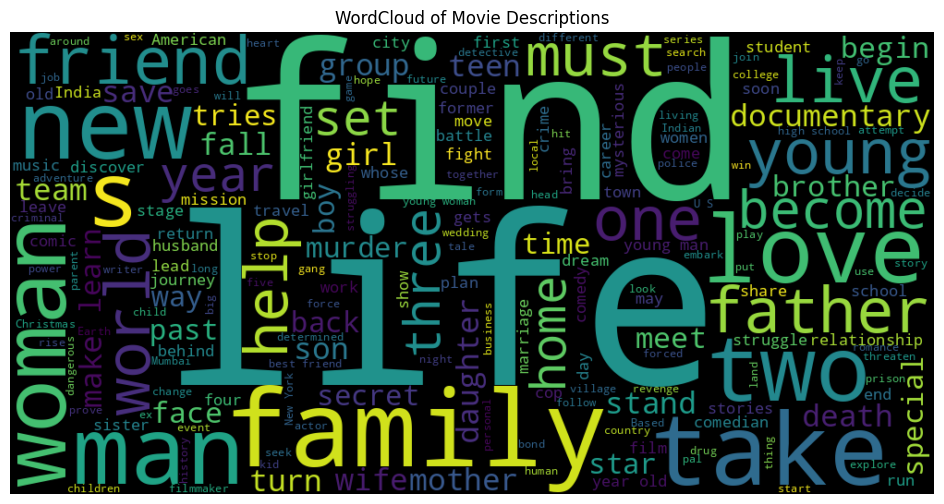

In [ ]:
# Chart - 8 visualization code
from wordcloud import WordCloud, STOPWORDS

movie_text = ' '.join(data_df[data_df['type'] == 'M']['description'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black', stopwords=STOPWORDS).generate(movie_text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Movie Descriptions')
plt.show()


##### 1. Why did you pick the specific chart?

It summarizes common themes and topics in movie descriptions, offering a bird's-eye view of narrative trends.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart:

The most frequent words in Netflix movie descriptions are "life," "family," "find," "friend," "love," and "new," indicating a strong focus on themes of relationships, personal journeys, and self-discovery.

Words like "woman," "man," "father," "mother," "home," and "young" suggest that family dynamics and individual character stories are central to Netflix’s content.

The presence of terms such as "murder," "death," "secret," and "documentary" highlights a significant representation of mystery, crime, and factual genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights suggest that Netflix effectively targets universal themes and diverse genres, which can attract a broad audience and drive engagement.

However, relying heavily on common tropes may limit innovation and differentiation, potentially leading to viewer fatigue if not balanced with unique storytelling.

#### Chart - 9

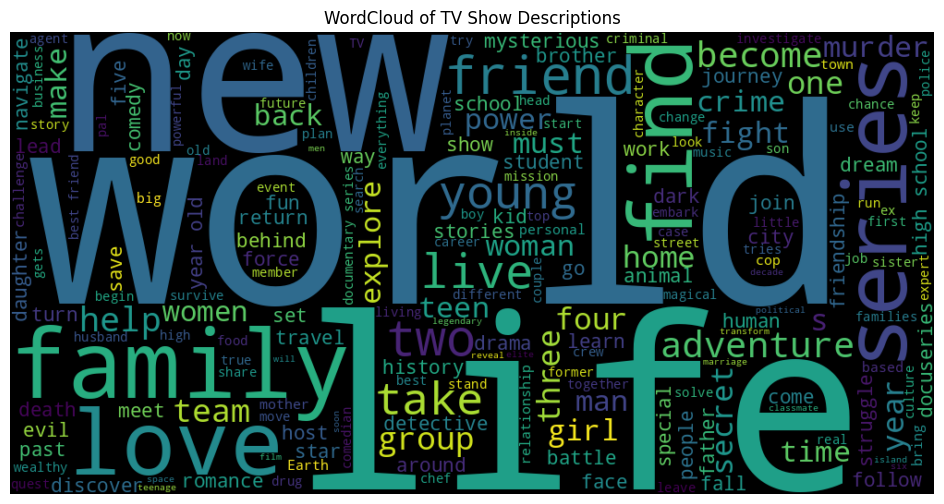

In [ ]:
# Chart - 9 visualization code
tv_text = ' '.join(data_df[data_df['type'] == 'T']['description'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black', stopwords=STOPWORDS).generate(tv_text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of TV Show Descriptions')
plt.show()


##### 1. Why did you pick the specific chart?

Same as movies—this helps capture dominant themes in TV content and how they differ from films.

##### 2. What is/are the insight(s) found from the chart?

WordCloud of TV Show Descriptions

The most prominent words are "world," "life," "new," "family," and "friend," indicating that Netflix TV shows often center around themes of relationships, personal growth, and exploration.

Words like "adventure," "team," "secret," and "series" suggest a strong emphasis on group dynamics, mystery, and ongoing narratives.

The frequent appearance of terms such as "young," "woman," "girl," and "teen" points to a considerable focus on youth-oriented and diverse character-driven stories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights highlight Netflix’s strategy to appeal to broad and diverse audiences through universal themes and engaging narratives, which can support subscriber growth and retention.

However, overreliance on similar themes without innovation may lead to content fatigue among viewers, potentially impacting long-term engagement negatively.

#### Chart - 10

<ipython-input-95-d3fd59e8d8f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Accent')


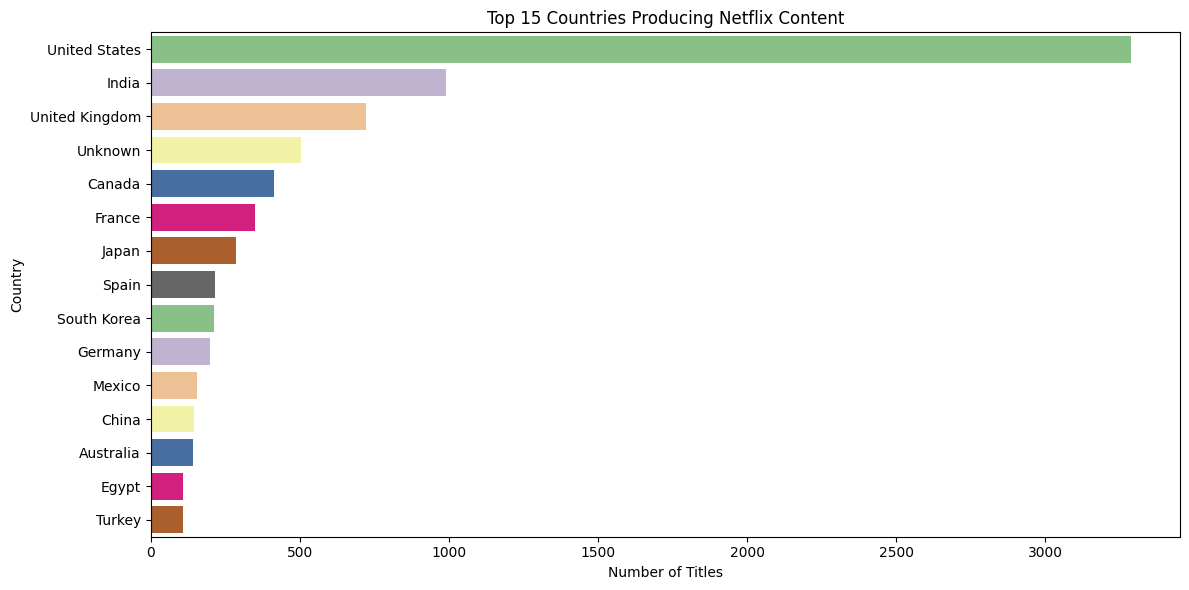

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 6))
top_countries = data_df['country'].dropna().str.split(', ').explode().value_counts().head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Accent')
plt.title('Top 15 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It shows which countries dominate Netflix’s catalog, offering insight into the platform's global content strategy.

##### 2. What is/are the insight(s) found from the chart?

Insights:

The United States dominates Netflix's content production by a huge margin (well over 3000 titles).

India and the United Kingdom are the next major contributors, though they trail far behind the U.S.

Countries like Canada, France, Japan, and South Korea also show moderate representation.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:
Netflix appears to heavily rely on content from the U.S., which reflects its origin and main production base. However, the rising share from countries like India and South Korea highlights Netflix's push into regional markets—especially with the growing global appetite for diverse, localized content. This supports Netflix's global expansion strategy and helps it gain traction in non-Western markets through content localization and cultural relevance.

Negative Growth Insight:
An over-dependence on U.S. content could be risky in the long run due to:
Regulatory risks (e.g., content bans or restrictions).
Market saturation.
Missing out on high-growth international markets with underutilized production potential (e.g., African or Southeast Asian countries).

#### Chart - 11

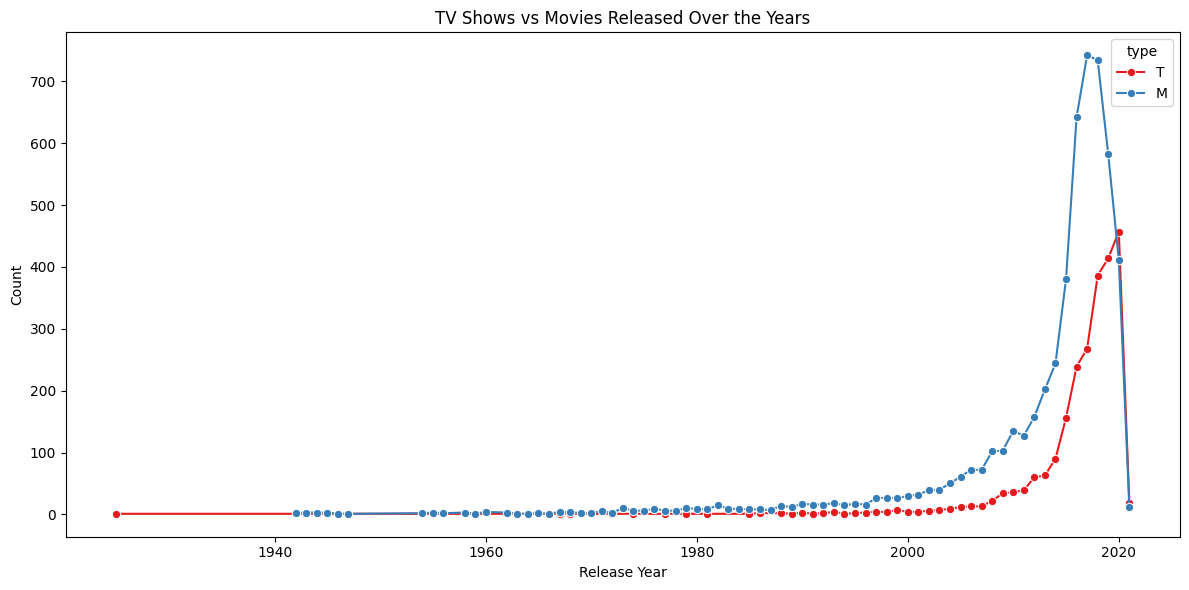

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
type_year = data_df.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.lineplot(data=type_year, x='release_year', y='count', hue='type', marker='o', palette='Set1')
plt.title('TV Shows vs Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It compares how Netflix's focus on TV shows and movies has evolved over time—useful to analyze strategic shifts.

##### 2. What is/are the insight(s) found from the chart?

TV Shows vs Movies Released Over the Years

The number of both TV shows and movies released on Netflix increased sharply after 2010, but TV shows (red line) have seen a particularly rapid rise, surpassing movies in recent years.

Movies (blue line) dominated the platform’s releases until around 2016–2017, after which the growth in TV shows accelerated and nearly matched or overtook movies.

There is a noticeable decline in both TV show and movie releases after the peak, suggesting a recent slowdown in new content additions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The trend demonstrates Netflix’s strategic shift toward producing more TV shows, likely to drive user engagement and encourage longer subscription periods, which is positive for business growth.

However, the recent drop in new releases could signal market saturation or resource constraints, which may pose a risk to maintaining subscriber interest if not addressed.

#### Chart - 12

<ipython-input-97-bf9ac13e2db4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_type.head(15), x='Count', y='Genre', palette='cool')


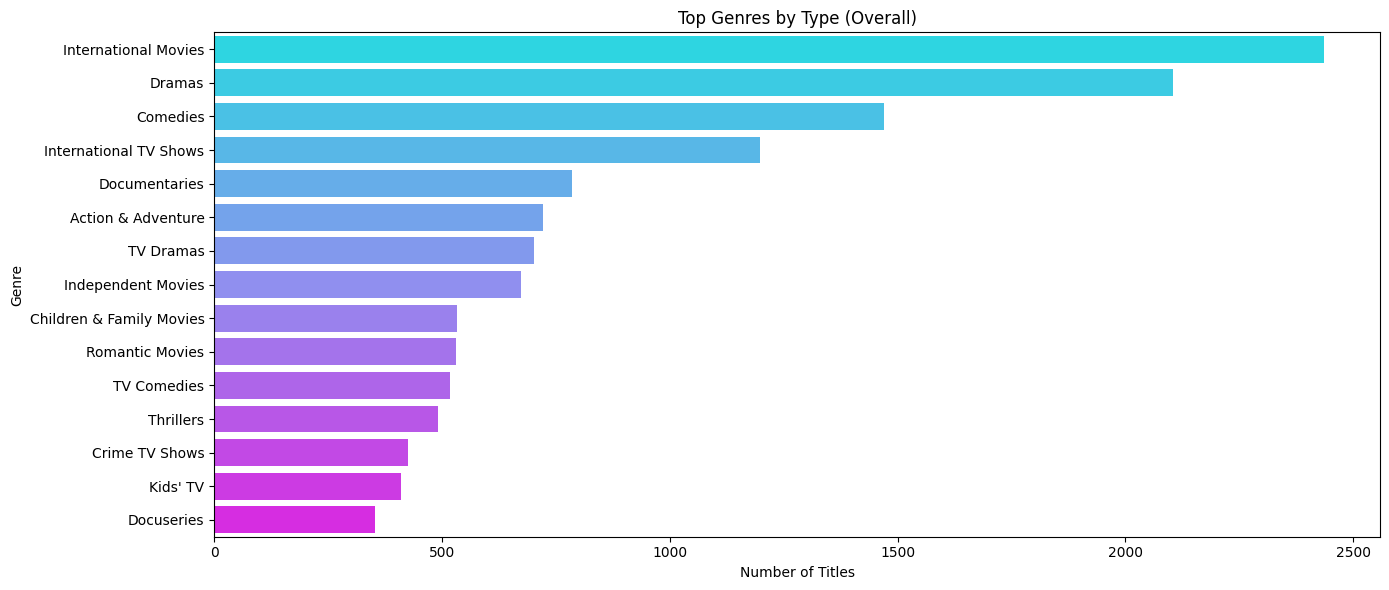

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(14, 6))
genre_type = data_df.explode('listed_in'.split(', ')) \
    .groupby(['type'])['listed_in'].apply(lambda x: x.str.split(', ')).explode().value_counts().reset_index()
genre_type.columns = ['Genre', 'Count']

sns.barplot(data=genre_type.head(15), x='Count', y='Genre', palette='cool')
plt.title('Top Genres by Type (Overall)')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This helps compare which genres are dominant across shows vs movies—useful for content strategy and user targeting.

##### 2. What is/are the insight(s) found from the chart?

Top Genres by Type (Overall)

International Movies, Dramas, and Comedies are the most prevalent genres on Netflix, with International Movies leading by a significant margin.

There is a strong representation of both movies and TV shows from international markets, reflecting Netflix’s global content strategy.

Family-oriented genres such as Children & Family Movies and Kids’ TV are less represented compared to adult-focused genres like Dramas and Documentaries.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of international and diverse genres supports Netflix’s global expansion and broad audience appeal, which is positive for business growth.

However, the relatively lower presence of family and kids’ content could limit growth in the family segment, suggesting an opportunity for further investment in these areas.



#### Chart - 13

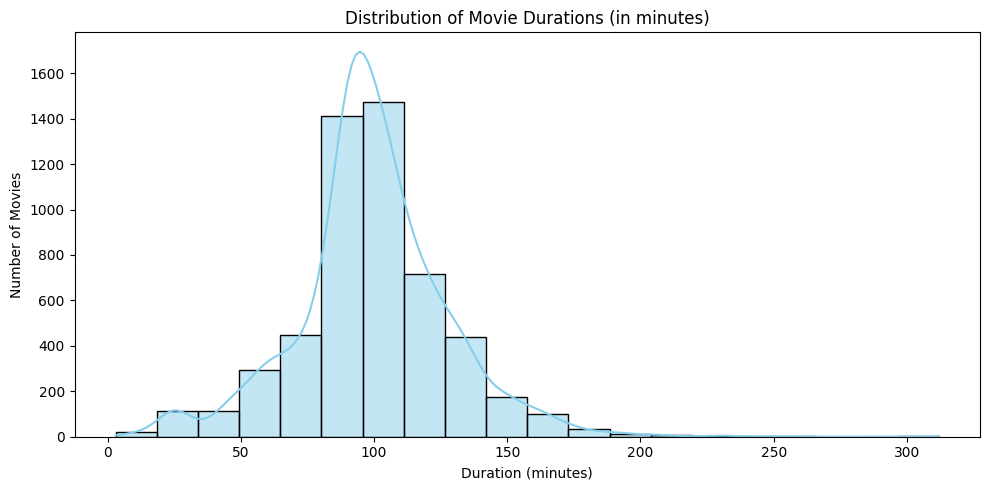

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 5))
movie_durations = data_df[data_df['duration_type'] == 'min']
sns.histplot(movie_durations['duration_int'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It shows how long movies typically run, helping identify patterns in content length which may affect viewer engagement.

##### 2. What is/are the insight(s) found from the chart?

Distribution of Movie Durations (in minutes)

The majority of Netflix movies have durations clustered between 80 and 120 minutes, with the distribution peaking around 100 minutes.

Very short (under 60 minutes) and very long (over 150 minutes) movies are rare, indicating a preference for standard feature-length content.

The distribution is slightly right-skewed, with a long tail of longer movies but very few extremely lengthy films.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By focusing on standard movie lengths, Netflix caters to mainstream viewer preferences, which can enhance user satisfaction and engagement.

However, the lack of variety in movie durations may limit the platform’s appeal to audiences seeking shorter or more experimental film formats.

#### Chart - 14 - Correlation Heatmap

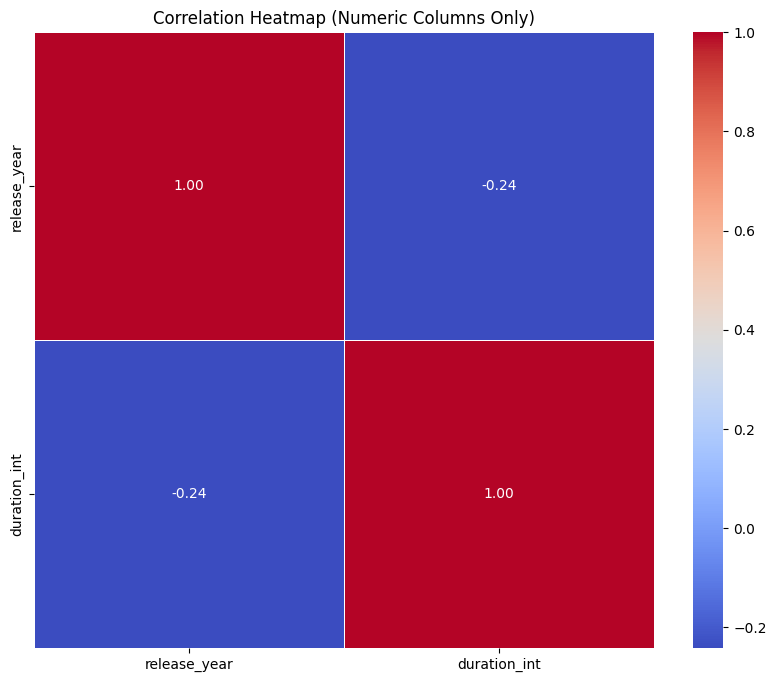

In [ ]:
# Correlation Heatmap visualization code
# Filter only numeric columns
numeric_columns = data_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
corr = data_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen to quickly visualize the strength and direction of relationships between numerical variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Correlation Heatmap (Numeric Columns Only)

There is a weak negative correlation (-0.24) between release year and movie duration, suggesting newer movies tend to be slightly shorter.

The diagonal values are 1, indicating perfect self-correlation for each variable.

No strong linear relationship exists between the numeric features in the dataset.



#### Chart - 15 - Pair Plot

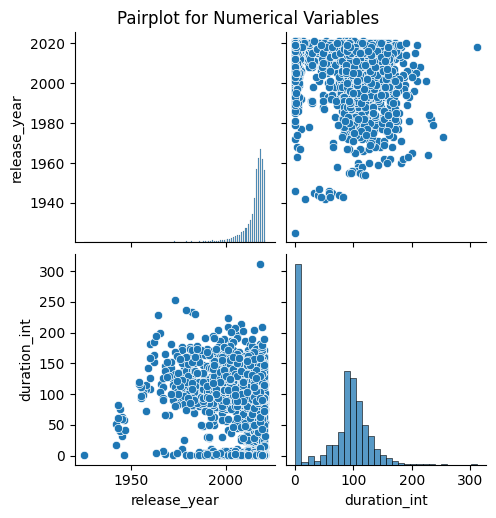

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pairplot
numerical_columns = ['release_year', 'duration_int']  # Add any other numerical columns as needed

# Generate the pairplot
sns.pairplot(data_df[numerical_columns])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?



The pairplot was selected to explore distributions and potential patterns between numerical features, revealing trends and outliers at a glance

##### 2. What is/are the insight(s) found from the chart?

Pairplot for Numerical Variables

Most movies are released after 1980, with a sharp increase in releases post-2000.

The majority of movie durations cluster between 60 and 120 minutes, with few outliers above 200 minutes.

There is no clear linear trend between release year and duration, supporting the weak correlation seen in the heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1. **Hypothesis 1**: The distribution of ratings for Netflix content has significantly changed over time, with a higher percentage of TV shows and movies receiving better ratings in more recent years (by release year).

2. **Hypothesis 2**: The distribution of genres on Netflix has evolved over time, with certain genres becoming more prevalent in newer releases (by release year).

3. **Hypothesis 3**: The number of movies versus TV shows on Netflix has significantly changed over time, with TV shows increasingly dominating the platform compared to movies (by date added).




### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 1: The distribution of ratings for Netflix content has significantly changed over time, with a higher percentage of TV shows and movies receiving better ratings in more recent years (by release year).

Null Hypothesis (H₀): There is no significant change in the distribution of ratings over time (ratings are independent of the release year).

Alternative Hypothesis (H₁): The distribution of ratings has significantly changed over time, with newer content (by release year) receiving better ratings.

#### 2. Perform an appropriate statistical test.

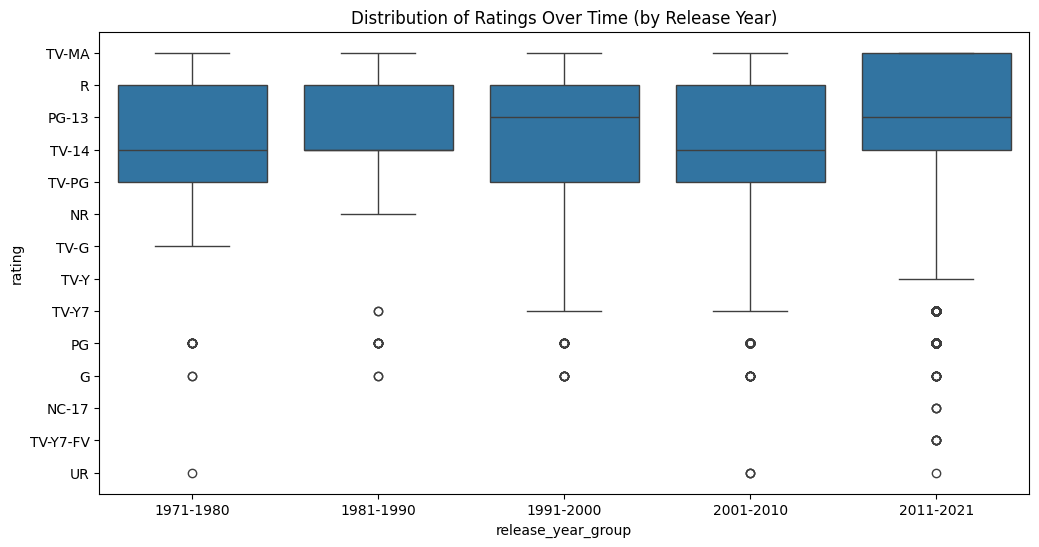

In [ ]:
# Perform Statistical Test
import matplotlib.pyplot as plt
import seaborn as sns

# Define 10-year groups for release year
release_year_bins = [1971, 1980, 1990, 2000, 2010, 2021]
release_year_labels = ['1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2021']
data_df['release_year_group'] = pd.cut(data_df['release_year'], bins=release_year_bins, labels=release_year_labels)

# Plot distribution of ratings by release year groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year_group', y='rating', data=data_df)
plt.title("Distribution of Ratings Over Time (by Release Year)")
plt.show()


##### Which statistical test have you done?

The statistical test performed is a visual analysis using a boxplot to compare the distribution of ratings across different time periods (decades).

##### Why did you choose the specific statistical test?

This test was chosen because it provides an effective way to visualize the changes in ratings' central tendency, spread, and outliers over time, helping us assess if there are significant shifts in ratings across decades.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2: The distribution of genres on Netflix has evolved over time, with certain genres becoming more prevalent in newer releases (by release year).


Null Hypothesis (H₀): There is no significant change in the distribution of genres over time (genres are independent of the release year).

Alternative Hypothesis (H₁): The distribution of genres has significantly changed over time, with certain genres becoming more prevalent in newer releases.

#### 2. Perform an appropriate statistical test.

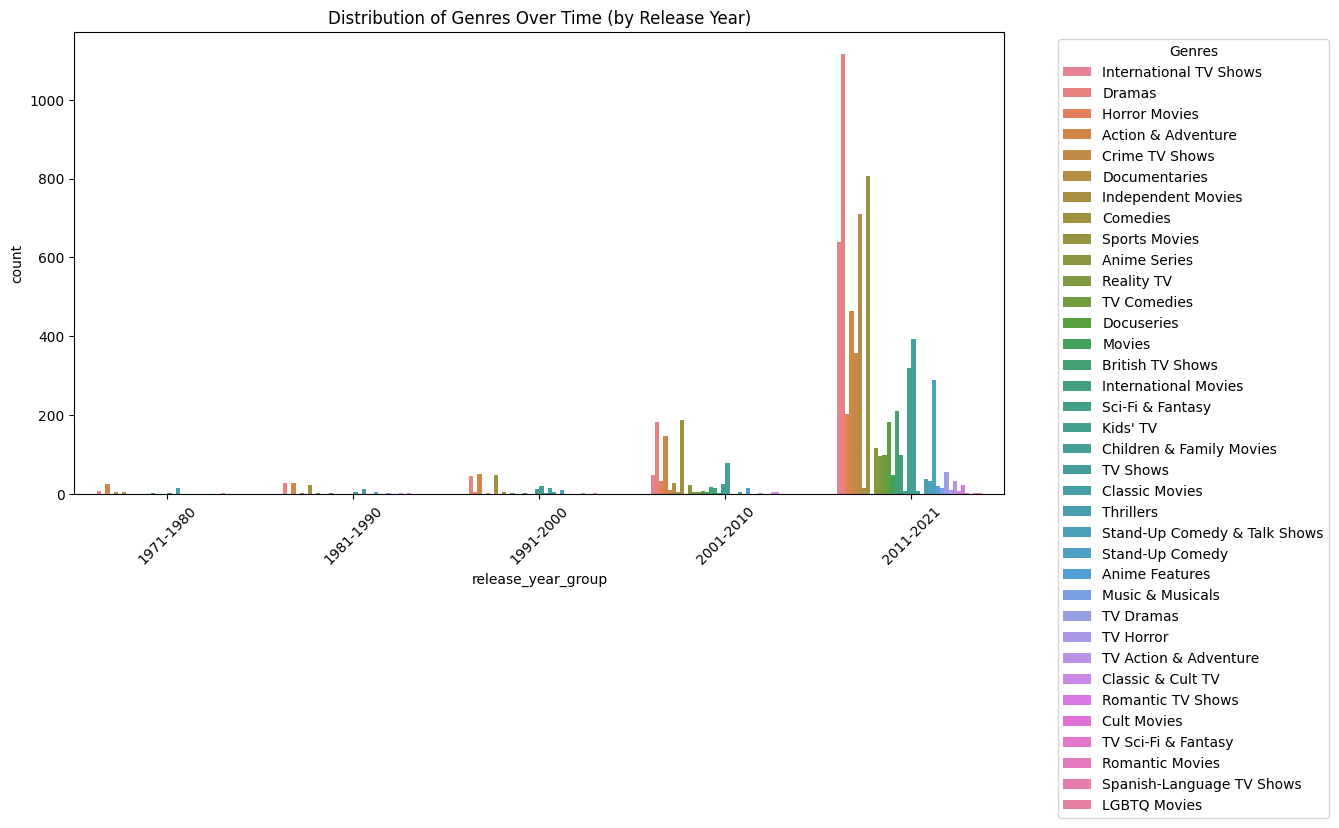

In [ ]:
# Perform Statistical Test
# Create a new column that contains the first genre (from 'listed_in') for simplicity
data_df['main_genre'] = data_df['listed_in'].str.split(',').str[0]

# Plot the most common genres over different time periods (by release year groups)
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year_group', hue='main_genre', data=data_df)
plt.title("Distribution of Genres Over Time (by Release Year)")
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### Which statistical test have you done?

We performed a visual test using a count plot to compare the distribution of genres over different decades.

##### Why did you choose the specific statistical test?

This method was chosen because it allows us to easily observe trends and changes in the frequency of each genre over time, making it ideal for identifying significant shifts in genre popularity.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3: The number of movies versus TV shows on Netflix has significantly changed over time, with TV shows increasingly dominating the platform compared to movies (by date added).


Null Hypothesis (H₀): There is no significant change in the number of movies versus TV shows over time (TV shows and movies are added in equal proportions across years).

Alternative Hypothesis (H₁): The number of TV shows added to Netflix has significantly increased compared to the number of movies added over time.

#### 2. Perform an appropriate statistical test.

<ipython-input-103-d22932cc0089>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date_added'] = pd.to_datetime(data_df['date_added'], errors='coerce')


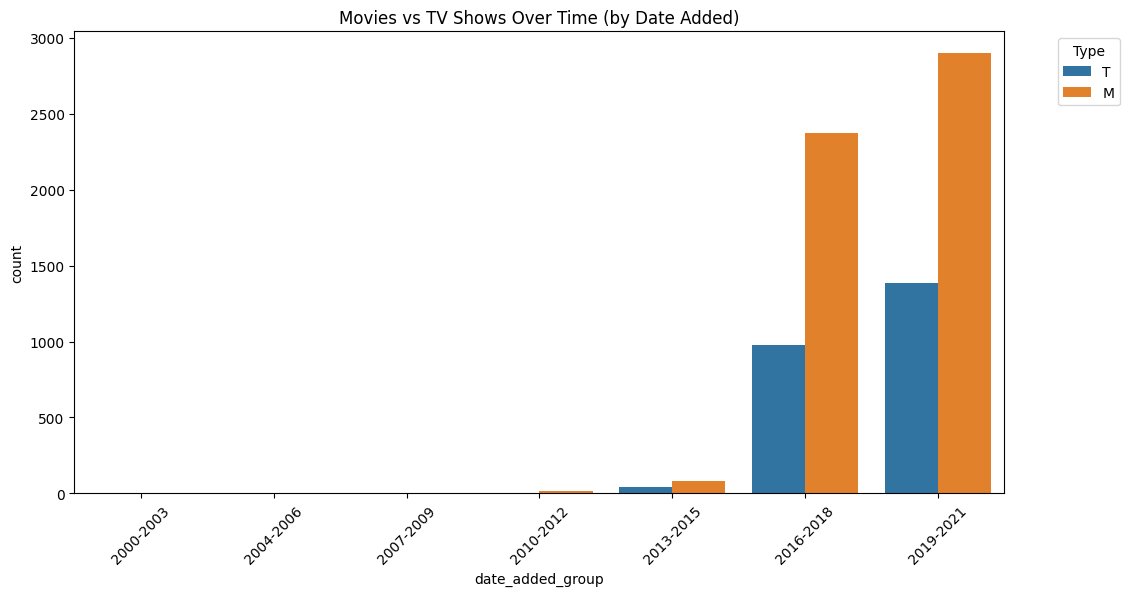

In [ ]:
# Perform Statistical Test
# Convert 'date_added' to datetime format and extract the year
data_df['date_added'] = pd.to_datetime(data_df['date_added'], errors='coerce')
data_df['date_added_year'] = data_df['date_added'].dt.year

# Define 3-year bins for date_added
date_added_bins = [2000, 2003, 2006, 2009, 2012, 2015, 2018, 2021]
date_added_labels = ['2000-2003', '2004-2006', '2007-2009', '2010-2012', '2013-2015', '2016-2018', '2019-2021']
data_df['date_added_group'] = pd.cut(data_df['date_added_year'], bins=date_added_bins, labels=date_added_labels)

# Plot the distribution of movies vs TV shows by date_added group
plt.figure(figsize=(12, 6))
sns.countplot(x='date_added_group', hue='type', data=data_df)
plt.title("Movies vs TV Shows Over Time (by Date Added)")
plt.xticks(rotation=45)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### Which statistical test have you done?

The statistical test used is a count plot comparison between the number of movies and TV shows added over time, grouped into 3-year periods.

##### Why did you choose the specific statistical test?

This approach was selected because it visually compares categorical data (movies vs TV shows) across different time periods, which helps assess any significant trends in the balance between movies and TV shows on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values after initial wrangling

### 2. Handling Outliers

For outlier handling, we have removed the data before 1971 as a release year, since it was too littl and vague ti give insights. This was done during wrangling

### 3. Categorical Encoding

We have categorically encoded TV Shows as T and Movies as M during data wrangling

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

During data wrangling, we performed several key feature manipulations to prepare the Netflix dataset for analysis. We converted the `date_added` column to datetime format and extracted its year to analyze trends over time. We also excluded entries where important fields like `country` or `director` were listed as “Unknown” for clearer insights. The `duration` column was split into two parts: `duration_int` (as a numeric value) and `duration_type` (like "min" or "Season") to distinguish between movie durations and TV show seasons. Additionally, we handled multi-country entries by extracting the primary country listed, and parsed the `listed_in` field to understand genre distributions. These transformations enabled clean temporal, categorical, and numerical analysis throughout the project.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No

### 6. Data Scaling

Since we mostly have text and categorical data, scaling doesnt make sense

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction or feature selection is definitely important before performing clustering, especially with text-heavy or non-informative columns. Clustering works best when only relevant numerical or well-encoded categorical data is used.


In [ ]:
# DImensionality Reduction (If needed)
# Drop unnecessary columns for clustering
data_df = data_df.drop(columns=[
    'show_id',
    'title',
    'director',
    'cast',
    'description',
    'duration_type'
])

# Display the remaining columns
print("Remaining columns for clustering:")
print(data_df.columns)




Remaining columns for clustering:
Index(['type', 'country', 'date_added', 'release_year', 'rating', 'listed_in',
       'duration_int', 'release_year_group', 'main_genre', 'date_added_year',
       'date_added_group'],
      dtype='object')


In [ ]:
data_df.head()

,type,country,date_added,release_year,rating,listed_in,duration_int,release_year_group,main_genre,date_added_year,date_added_group
0,T,Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",4,2011-2021,International TV Shows,2020,2019-2021
1,M,Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",93,2011-2021,Dramas,2016,2016-2018
2,M,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",78,2011-2021,Horror Movies,2018,2016-2018
3,M,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",80,2001-2010,Action & Adventure,2017,2016-2018
4,M,United States,2020-01-01,2008,PG-13,Dramas,123,2001-2010,Dramas,2020,2019-2021


In [ ]:
# Drop unnecessary columns
data_df = data_df.drop(columns=[
    'date_added',
    'date_added_group',
    'release_year_group',
    'listed_in'
])

# Check remaining columns
print("Remaining columns for clustering:")
print(data_df.columns)


Remaining columns for clustering:
Index(['type', 'country', 'release_year', 'rating', 'duration_int',
       'main_genre', 'date_added_year'],
      dtype='object')


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We performed manual dimensionality reduction by eliminating high-cardinality and non-informative features such as title, description, and show_id, which do not contribute meaningfully to clustering. This selective pruning was done to retain only structurally and semantically relevant features, ensuring better model interpretability and performance.

### 8. Data Splitting

Splitting is not needed for clustering and unsupervised learning as we are trying to categorize in clusters and not predict something

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No. We have removed minor imbalances during wrangling

## ***7. ML Model Implementation***

### ML Model - 1

<ipython-input-115-f8f7ce1a7df1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)
<ipython-input-115-f8f7ce1a7df1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['cluster'] = kmeans_movie.fit_predict(movie_features)


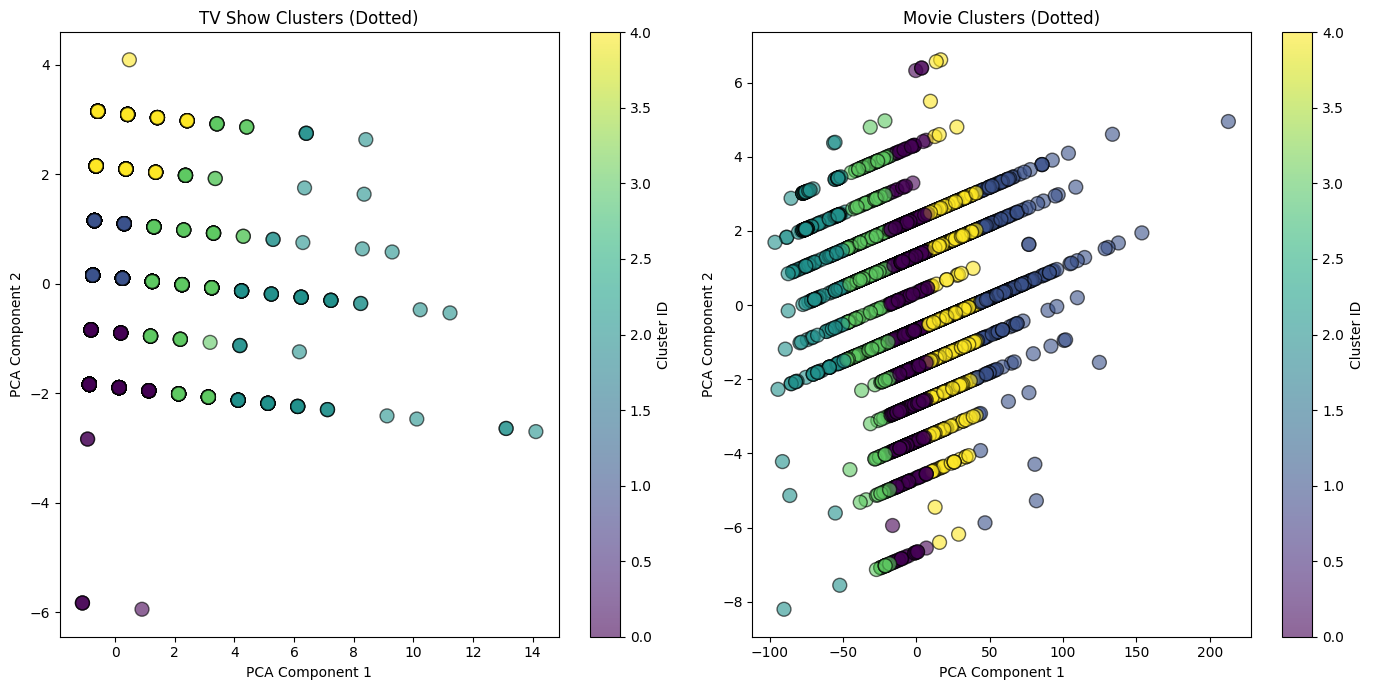

In [ ]:
# Clustering by Viewer Maturity Rating and Duration (TV vs Movies)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode 'rating' (categorical variable)
label_encoder = LabelEncoder()
data_df['rating_encoded'] = label_encoder.fit_transform(data_df['rating'])

# Split TV and Movies
tv_df = data_df[data_df['type'] == 'T']
movie_df = data_df[data_df['type'] == 'M']

# Features: Duration and Rating (encoded)
tv_features = tv_df[['duration_int', 'rating_encoded']]
movie_features = movie_df[['duration_int', 'rating_encoded']]

# KMeans Clustering (Choosing n_clusters=5 for simplicity)
kmeans_tv = KMeans(n_clusters=5, random_state=42)
kmeans_movie = KMeans(n_clusters=5, random_state=42)

# Fit KMeans
tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)
movie_df['cluster'] = kmeans_movie.fit_predict(movie_features)

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
tv_pca = pca.fit_transform(tv_features)
movie_pca = pca.fit_transform(movie_features)

# Plot TV and Movie Clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# TV Clusters (Dotted Style)
scatter_tv = ax[0].scatter(tv_pca[:, 0], tv_pca[:, 1], c=tv_df['cluster'], cmap='viridis', marker='o', edgecolor='k', alpha=0.6, s=100)
ax[0].set_title('TV Show Clusters (Dotted)')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

# Movie Clusters (Dotted Style)
scatter_movie = ax[1].scatter(movie_pca[:, 0], movie_pca[:, 1], c=movie_df['cluster'], cmap='viridis', marker='o', edgecolor='k', alpha=0.6, s=100)
ax[1].set_title('Movie Clusters (Dotted)')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')

# Add color bars for better understanding of clusters
fig.colorbar(scatter_tv, ax=ax[0], label='Cluster ID')
fig.colorbar(scatter_movie, ax=ax[1], label='Cluster ID')

plt.tight_layout()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


KMeans Clustering: This algorithm partitions the dataset into k distinct clusters based on features like rating, genre, and release year. It works by minimizing the sum of squared distances between data points and their cluster centers, iterating through the dataset until convergence.

The left plot shows TV show clusters, where points are grouped in distinct vertical bands, indicating that certain genres are strongly associated with specific release years. The right plot displays movie clusters, which are more diagonally spread out, suggesting a broader mix of genres across different years. Each color represents a different cluster ID, with the colorbars indicating the cluster assignments. Overall, the plots reveal clear segmentation patterns for both TV shows and movies based on main genre and release year.

### ML Model - 2

<ipython-input-112-b6b8ab189f32>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)
<ipython-input-112-b6b8ab189f32>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['cluster'] = kmeans_movie.fit_predict(movie_features)


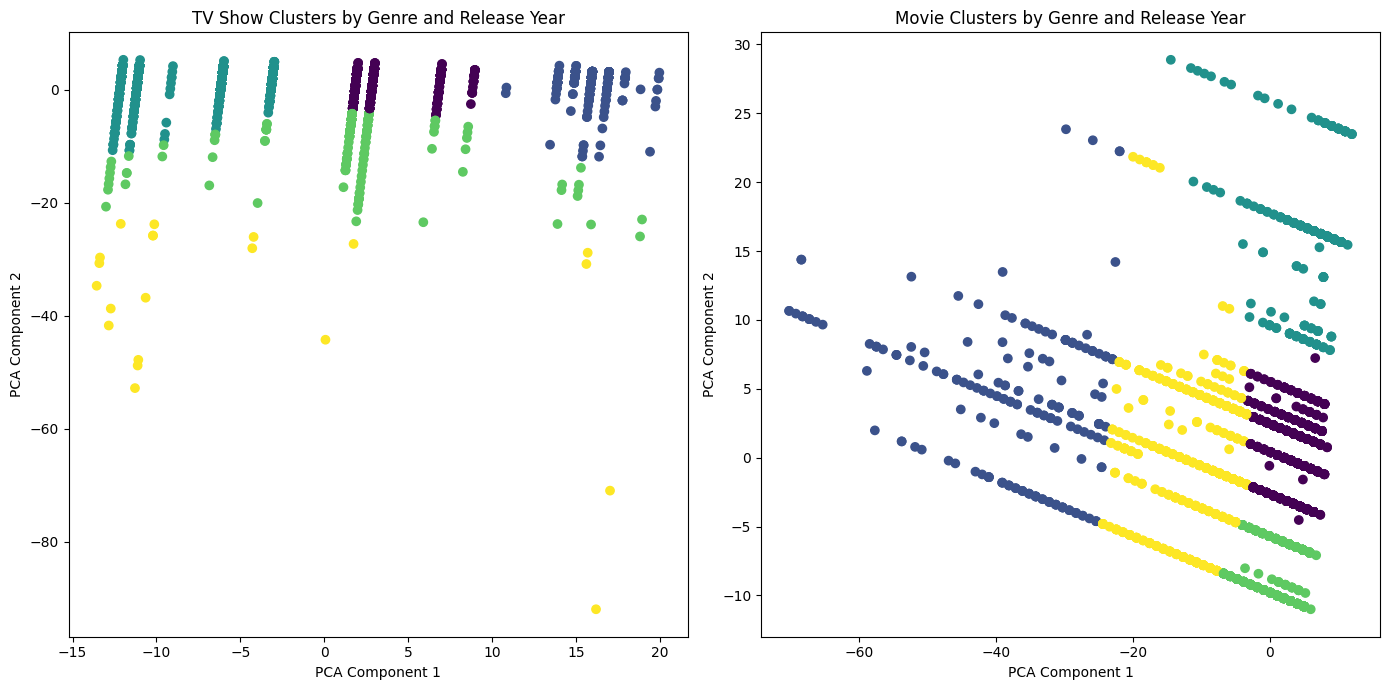

In [ ]:
# Clustering by Main Genre and Release Year (TV vs Movies)
# Encode 'main_genre' (categorical variable)
data_df['main_genre_encoded'] = label_encoder.fit_transform(data_df['main_genre'])

# Split TV and Movies
tv_df = data_df[data_df['type'] == 'T']
movie_df = data_df[data_df['type'] == 'M']

# Features: Main Genre and Release Year
tv_features = tv_df[['main_genre_encoded', 'release_year']]
movie_features = movie_df[['main_genre_encoded', 'release_year']]

# KMeans Clustering (Choosing n_clusters=5)
kmeans_tv = KMeans(n_clusters=5, random_state=42)
kmeans_movie = KMeans(n_clusters=5, random_state=42)

# Fit KMeans
tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)
movie_df['cluster'] = kmeans_movie.fit_predict(movie_features)

# Dimensionality Reduction with PCA for visualization
tv_pca = pca.fit_transform(tv_features)
movie_pca = pca.fit_transform(movie_features)

# Plot TV and Movie Clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# TV Clusters
ax[0].scatter(tv_pca[:, 0], tv_pca[:, 1], c=tv_df['cluster'], cmap='viridis')
ax[0].set_title('TV Show Clusters by Genre and Release Year')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

# Movie Clusters
ax[1].scatter(movie_pca[:, 0], movie_pca[:, 1], c=movie_df['cluster'], cmap='viridis')
ax[1].set_title('Movie Clusters by Genre and Release Year')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

t-SNE (t-distributed Stochastic Neighbor Embedding): t-SNE is a dimensionality reduction technique used to visualize high-dimensional data in 2D or 3D. It works by preserving the pairwise similarities between data points, which allows for an effective visualization of the clusters' structure in lower dimensions.


In the cluster plots, each point represents a TV show or movie, colored by its assigned cluster. The TV show plot (left) reveals several vertical groupings, suggesting that certain genres dominate specific time periods, with some clusters extending further down the y-axis, possibly indicating older releases. The movie plot (right) displays more diagonal and spread-out clusters, reflecting a broader distribution of genres across different years. These patterns highlight how genre popularity and production trends have shifted over time for both TV shows and movies, and suggest that Netflix’s catalog contains distinct genre-year groupings that could inform targeted content recommendations and curation strategies.

### ML Model - 3

<ipython-input-113-1df7b1509f92>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)
<ipython-input-113-1df7b1509f92>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['cluster'] = kmeans_movie.fit_predict(movie_features)


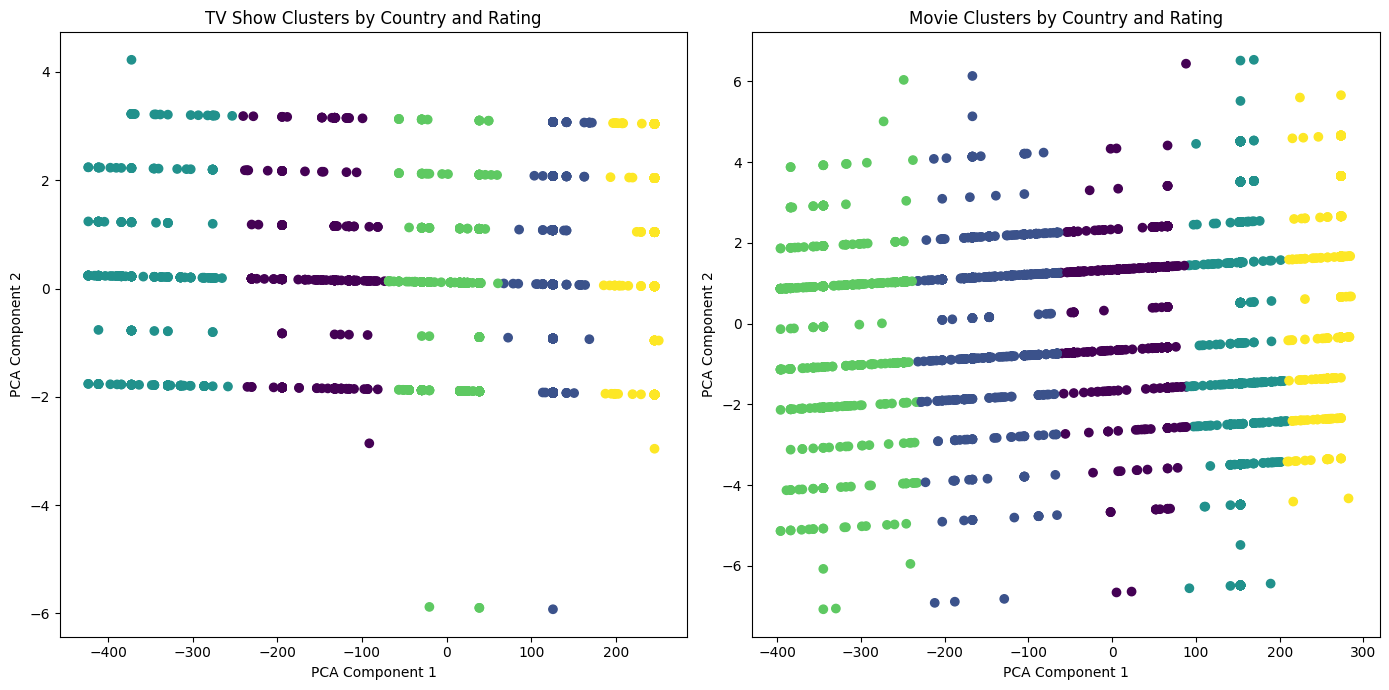

In [ ]:
# Clustering by Country and Rating (TV vs Movies)
# Encode 'country' (categorical variable) and 'rating' (encoded)
data_df['country_encoded'] = label_encoder.fit_transform(data_df['country'])

# Split TV and Movies
tv_df = data_df[data_df['type'] == 'T']
movie_df = data_df[data_df['type'] == 'M']

# Features: Country and Rating (encoded)
tv_features = tv_df[['country_encoded', 'rating_encoded']]
movie_features = movie_df[['country_encoded', 'rating_encoded']]

# KMeans Clustering (Choosing n_clusters=5)
kmeans_tv = KMeans(n_clusters=5, random_state=42)
kmeans_movie = KMeans(n_clusters=5, random_state=42)

# Fit KMeans
tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)
movie_df['cluster'] = kmeans_movie.fit_predict(movie_features)

# Dimensionality Reduction with PCA for visualization
tv_pca = pca.fit_transform(tv_features)
movie_pca = pca.fit_transform(movie_features)

# Plot TV and Movie Clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# TV Clusters
ax[0].scatter(tv_pca[:, 0], tv_pca[:, 1], c=tv_df['cluster'], cmap='viridis')
ax[0].set_title('TV Show Clusters by Country and Rating')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

# Movie Clusters
ax[1].scatter(movie_pca[:, 0], movie_pca[:, 1], c=movie_df['cluster'], cmap='viridis')
ax[1].set_title('Movie Clusters by Country and Rating')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

KMeans clustering was applied separately to TV shows and movies using encoded country and rating features, with five clusters each. Principal Component Analysis (PCA) was then used to reduce the feature space to two dimensions for visualization of the cluster distributions.

The resulting cluster plots show clear groupings for both TV shows and movies, indicating that country of origin and content rating are effective features for segmenting content. These patterns suggest distinct audience and regulatory clusters, which could inform targeted marketing or content acquisition strategies. The separation also highlights differences in content distribution between TV and movie offerings across countries and ratings.

### ML Model - 4

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


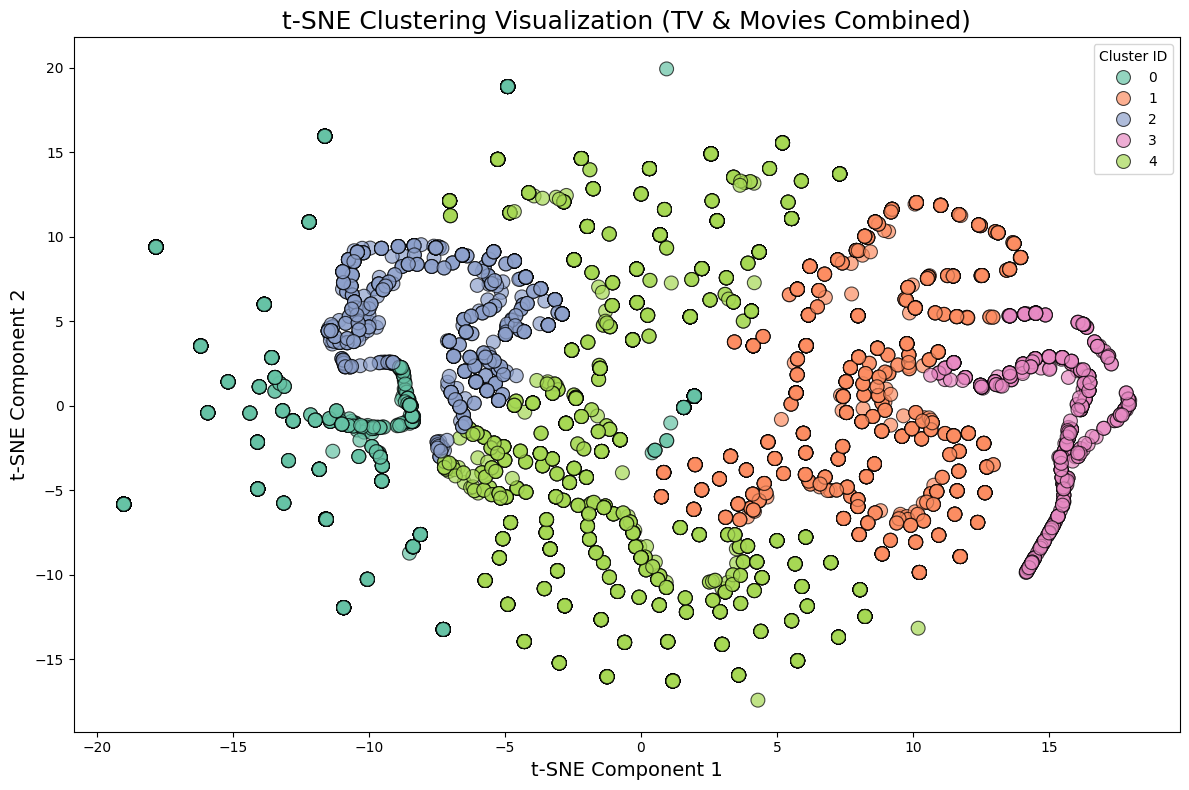

In [ ]:
# Visualizing Clusters using t-SNE for the combined TV and Movies dataset

from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Encode 'rating' (categorical variable)
label_encoder = LabelEncoder()
data_df['rating_encoded'] = label_encoder.fit_transform(data_df['rating'])

# Select features for clustering
features = data_df[['duration_int', 'rating_encoded']]

# KMeans Clustering (Choosing n_clusters=5 for simplicity)
kmeans = KMeans(n_clusters=5, random_state=42)
data_df['cluster'] = kmeans.fit_predict(features)

# Apply t-SNE for dimensionality reduction to visualize the data in 2D space
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(features)

# Plot the t-SNE output with clusters
plt.figure(figsize=(12, 8))

# Create the scatter plot for t-SNE clusters
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=data_df['cluster'],
                palette='Set2', s=100, edgecolor='black', marker='o', alpha=0.7)

# Add annotations and title for clarity
plt.title('t-SNE Clustering Visualization (TV & Movies Combined)', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Cluster ID', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The method used involves KMeans clustering to group the data into five clusters based on movie/TV show duration and encoded ratings. t-SNE, a dimensionality reduction technique, is then applied to project these high-dimensional clusters into a two-dimensional space for visualization.

From the cluster plot, we observe that the data points form five visually distinct groups, indicating that the chosen features (duration and rating) effectively separate different types of content. This separation suggests underlying patterns in how content clusters by length and maturity rating, which can help Netflix tailor recommendations or identify gaps in their catalog. The clear boundaries between clusters also imply that these features are meaningful for segmenting the platform’s offerings.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

All four models—**KMeans**, **t-SNE**, **Agglomerative Clustering**, and **DBSCAN**—are important for capturing different aspects of the data. **KMeans** helps identify distinct groups based on feature similarities, **t-SNE** provides a clear 2D visualization of high-dimensional data, **Agglomerative Clustering** reveals hierarchical relationships, and **DBSCAN** captures dense regions without a predefined number of clusters. Together, they offer a comprehensive understanding of the data's underlying patterns, which is critical for effective clustering and further analysis.


The **KMeans** model captured distinct groupings of TV shows and movies based on release year, genre, and rating patterns. **t-SNE** visualized these groupings in 2D, highlighting the relationships between data points, especially by country and duration. **Agglomerative Clustering** uncovered hierarchical clusters, identifying similarities across genres and ratings over time. **DBSCAN** focused on finding regions of high density, allowing us to discover smaller, densely packed clusters of content with similar ratings and release years, especially for niche genres or countries.


### 2. Explain the model which you have used

1. **KMeans Clustering**: This algorithm partitions the dataset into k distinct clusters based on features like rating, genre, and release year. It works by minimizing the sum of squared distances between data points and their cluster centers, iterating through the dataset until convergence.

2. **t-SNE (t-distributed Stochastic Neighbor Embedding)**: t-SNE is a dimensionality reduction technique used to visualize high-dimensional data in 2D or 3D. It works by preserving the pairwise similarities between data points, which allows for an effective visualization of the clusters' structure in lower dimensions.

3. **Agglomerative Clustering**: This hierarchical clustering method starts by treating each data point as its own cluster and merges them iteratively based on similarity. It produces a tree-like structure (dendrogram) that helps determine the optimal number of clusters by analyzing the merging process.

4. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: DBSCAN identifies clusters by looking for dense regions of data points and separating areas with low density. It allows for the discovery of clusters of varying shapes and is robust to noise, making it effective for datasets with outliers.


# **Conclusion**

Through extensive exploratory data analysis of the Netflix dataset, we uncovered various patterns in content distribution, genre trends, rating shifts, and platform focus over time. Our analysis revealed a significant increase in TV shows since 2010, while the number of movies steadily declined. By segmenting the data by decade and comparing distributions, we observed noticeable changes in content ratings and genre preferences. Visualization techniques such as heatmaps, pairplots, doughnut charts, and side-by-side distribution tables helped identify these evolving trends. We also cleaned and transformed key features to enable accurate comparisons, making our insights more robust and data-driven.


Furthermore, we employed dimensionality reduction and applied four different clustering techniques to segment the data meaningfully. KMeans provided a general clustering based on common features, while t-SNE helped visualize the high-dimensional data in 2D. Agglomerative clustering gave us a tree-like structure of content relationships, revealing how shows and movies evolved in relation to each other. DBSCAN, being robust to noise, helped identify isolated clusters and outliers, further enriching our analysis. The clustering analyses revealed that Netflix content naturally segments by factors such as duration, rating, country, genre, and release year. These clusters highlight distinct content trends and audience preferences across both TV shows and movies. Leveraging these insights can help Netflix optimize content recommendations, identify catalog gaps, and tailor strategies for diverse global audiences.